<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>
# Worksheet S1: Introducción a TensorFlow

## Objetivos

El objetivo de este worksheet es comprender el funcionamiento básico de TensorFlow, una libreria de código abierto desarrollada por Google que se utiliza en la gran mayoria de empresas y universidades de gran prestigio.

## Introducción

TensorFlow es una librería muy completa que nos permite trabajar en diferentes niveles de abstracción. En este worksheet vamos a ver las características básicas del Core de TensorFlow, es decir, del nivel más bajo que nos permite un control total sobre nuestros modelos. 

## Importing TensorFlow

Lo primero que tenemos que hacer para trabajar con tensorflow es importarlo. Esto permitirá a nuestra terminal python acceder a todas las clases, métodos y símbolos de TensorFlow. Normalmente se importa con el sobrenombre tf para hacer las instrucciones más cortas, de la siguiente forma:


Quick Tensorflow basics review: https://www.youtube.com/watch?v=2FmcHiLCwTU

## Tensores

La unidad básica de datos en TensorFlow es el tensor. Un tensor es un conjunto de valores primitivos en forma de array con cualquier número de dimensiones. El rango de un tensor es su número de dimensiones, a continuación podemos ver cómo definir en TensorFlow algunos ejemplos.

In [4]:
import numpy as np
import tensorflow as tf

t1 = 3 # un tensor de rango 0; escalar con dimension []
t2 = [1., 2., 3.] # un tensor de rango 1; vector con dimension [3]
t3 = [[1., 2., 3.], [4., 5., 6.]] # un tensor de rango 2; matriz con dimension [2, 3]
t4 = [[[1., 2., 3.]], [[7., 8., 9.]]] # un tensor de rango tres con dimensión [2, 1, 3]

In [9]:
### TODO: migrar a TF2.0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## El grafo computacional

El núcleo de TensorFlow se compone de dos secciones:

- Construcción del grafo computacional
- Ejecucción del grafo computacional

Un grafo computacional es una serie de operaciones de TensorFlow que está compuesta de nodos. Vamos a comenzar construyendo un grafo computacional simple. Cada nodo recibe como entrada cero o más tensores y produce un tensor como salida. Las constantes son un tipo de nodo. Como cualquier otra constante, un nodo que contiene una constante no tiene entradas, y produce una salida que contiene el valor que guarda internamente. Podemos crear dos tensores (coma flotante) _node1_ y _node2_ de la siguiente forma:

In [10]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # tipo tf.float32 por defecto
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


<font color='blue'> mi nota: un node de constante no tiene salida, es la constante </font>

Si nos fijamos, la salida de la función _print_ no ha mostrado los valores 3.0 y 4.0 que cabría esperar. Esto es porque las variables _node1_ y _node2_ son nodos que, cuando son evaluados, producen 3.0 y 4.0 respectivamente. Para evaluar los nodos, tenemos que ejecutar el grafo computacional dentro de una sesión. Una sesión encapsula el control y estado de una ejecución TensorFlow.

El código que vemos a continuación crea una sesión e invoca su ejecución para evaluar las variables _node1_ y _node2_:

In [11]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


Como podemos ver, ahora la función print sí ha impreso los valores 3.0 y 4.0 que esperabamos. 

Podemos también realizar cómputos más elaborados combinando nodos Tensor con operaciones (las operaciones también son nodos en el entorno TensorFlow). Por ejemplo, podemos sumar dos nodos constante y producir un nuevo grafo de la siguiente forma:

In [12]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + es una forma más rápida de utilizar tf.add(a, b)

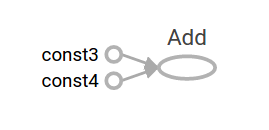

In [7]:
from IPython.display import Image
Image("project\\mioti\\notebooks\\S1_01.png", width=3, height=5)

In [13]:
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add_1:0", shape=(), dtype=float32)
sess.run(node3): 7.0


Lo que acabamos de definir es más o menos una función en el que definimos dos parámetros de entrada (_a_ y _b_) y una operación (_+_). Para evaluar este grafo tenemos que dar primero un valor a los _placeholders_. Podemos evaluar este grafo con una o varias entradas de la siguiente forma:

In [14]:
print(sess.run(adder_node, {a: 3, b: 4.5}))
print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))

7.5
[3. 7.]


Como podemos ver, el grafo que acabamos de crear puede utilizarse con tensores de distinto rango y realiza la suma de estas entradas. El grafo tiene esta forma:

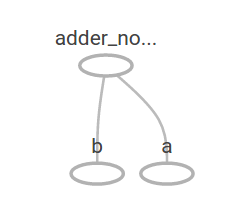

In [5]:
from IPython.display import Image
Image("project\\mioti\\notebooks\\S1_02.png", width=3, height=5)

In [0]:
De esta forma, podemos continuar con grafos más complejos añadiendo más operaciones, por ejemplo:

add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))

## Variables

En Machine Learning, típicamente queremos un modelo que pueda recibir cualquier numero de entradas, como el que acabamos de crear. Sin embargo, para poder hacer un modelo entrenable, necesitamos poder modificar el grafo de forma que las mismas entradas puedan producir nuevas salidas. Para ello, tenemos que utilizar _Variables_ TensorFlow. Estas variables nos permiten añadir parámetros entrenables a un grafo. Se definen con un tipo y un valor inicial:

In [0]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b

Las constantes se inicializan de forma automática cuando las definimos utilizando tf.constant, y su valor nunca cambia. Sin embargo, las variables no se inicializan al crear la variable. Para inicializar todas las variables en TensorFlow, tenemos que utilizar de forma explícita la siguiente función:

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
sess.run(W)

De esta forma, _init_ se encargará de inicializar todas las variables globales una vez que es llamado dentro de una sesión TensorFlow.

Como _x_ es un _placeholder_, podemos evaluar _linear_model_ para distintos valores de _x_ simultánemaente de la siguiente forma:

In [0]:
sess.run(linear_model, {x: [1, 2, 3, 4]})

## Evaluación del modelo

Ya hemos creado un modelo, pero aún no tenemos ninguna forma de evaluarlo. Para evaluar un modelo en datos de entremiento, necesitamos otro placeholder que provea nuestras etiquetas o _ground_truth_ con los valores esperados, además de una función de coste.

La función de coste mide la desviación existente entre los valores predichos por el modelo y los valores deseados. Vamos a comenzar utilizando una función de coste típica en regresión lineal, que consiste en la suma de los cuadrados de la diferencia entre ambos valores. Traducido al entorno TensorFlow esto se hace de la siguiente forma:

In [13]:
y = tf.placeholder(dtype=tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

In [14]:
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


Donde:
- _linear_\__model - y_ es la diferencia entre los valores predichos y los valores deseados
- _tf.square_ realiza los cuadrados de dichos valores
- _tf.reduce_\__sum_ realiza la suma de todos los cuadrados, creando un escalar que podemos ver como el error de todos los ejemplos.

Podríamos mejorar nuestro modelo asignando de forma manual los valores óptimos a _W_ y _b_ (-1 y 1 respectivamente). Una variable se inicializa con el valor preasignado cuando fue definida pero puede cambiarse utilizando funciones como _tf.assign_. Esto se hace de la sigueinte forma:

In [15]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

0.0


Como podemos ver, una vez hemos asignado los valores óptimos a _W_ y _b_ obtenemos un error 0. Aun así, nuestro objetivo cuando enfrentamos un problema de Machine Learning es encontrar estos valores de forma automática.

## Machine Learning en TensorFlow

TensorFlow tiene distintos optimizadores que van cambiando poco a poco el valor de las variables para minimzar la función de coste. El optimizador más simple (y en el que están basados casi todos los demás) es el descenso de gradiente. Este optimizador modifica cada variable en función de la derivada parcial de la función de coste con respecto de dicha variable. Generalmente, calcular las derivadas parciales es complicado, tedioso e induce a muchos errores. Por suerte, TensorFlow es capaz de realizar todos los cálculos de forma automática cuando invocamos un optimizador. El código sería de la siguiente forma:

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
print(sess.run([W, b]))
for i in range(1000):
  sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([W, b]))

[array([0.3], dtype=float32), array([-0.3], dtype=float32)]
[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


Enhorabuena! Ahora sí que hemos hecho Machine Learning. 

A modo de resúmen, este es el código que se necesita para el modelo de regresor lineal que acabamos de entrenar:

In [16]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the error squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss) # model trainer

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11
